<a href="https://colab.research.google.com/github/hamednasr/PyTorch/blob/main/neural_network_calculator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **neural network calculator**

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader,TensorDataset
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from IPython import display
display.set_matplotlib_formats('svg')

# creat data sets

In [ ]:
data = np.random.randint(-10,11,(40,2))
data

array([[  4,   5],
       [  0,  10],
       [-10,   9],
       [ -6,  -9],
       [ -5,  -5],
       [-10,   9],
       [ 10,   8],
       [ -3,  -6],
       [ -6, -10],
       [ -9,   5],
       [ -3,  -1],
       [  5,   5],
       [  1,  -4],
       [  2,  -8],
       [ 10,  -8],
       [ -7,  -1],
       [  6,   7],
       [  8,   3],
       [-10,   5],
       [ -3,  -4],
       [  7,   9],
       [ -6,   6],
       [  6,  -4],
       [ -1,   4],
       [ -4,   9],
       [ -7,  -2],
       [ -9,  -9],
       [ -6,   9],
       [ 10,   9],
       [  8,   8],
       [  1,   6],
       [ -8,   3],
       [  3,   7],
       [ -3,  -8],
       [  2,   2],
       [  6,  -1],
       [ -7,   2],
       [  8,  -8],
       [  8, -10],
       [  4,   6]])

In [ ]:
z = np.sum(data, axis =1)
z = z[:,None]
z

array([[  9],
       [ 10],
       [ -1],
       [-15],
       [-10],
       [ -1],
       [ 18],
       [ -9],
       [-16],
       [ -4],
       [ -4],
       [ 10],
       [ -3],
       [ -6],
       [  2],
       [ -8],
       [ 13],
       [ 11],
       [ -5],
       [ -7],
       [ 16],
       [  0],
       [  2],
       [  3],
       [  5],
       [ -9],
       [-18],
       [  3],
       [ 19],
       [ 16],
       [  7],
       [ -5],
       [ 10],
       [-11],
       [  4],
       [  5],
       [ -5],
       [  0],
       [ -2],
       [ 10]])

In [ ]:
dataT = torch.FloatTensor(data)

In [ ]:
zT=torch.FloatTensor(z)

# create dataloader objects

In [ ]:
train_data,test_data,train_labels,test_labels = train_test_split(dataT,zT,test_size=0.2)

train_sets = TensorDataset(train_data,train_labels)
test_sets = TensorDataset(test_data,test_labels)

batchsize = 32
train_loader = DataLoader(train_sets, batch_size=batchsize, shuffle=True, drop_last=True)
test_loader = DataLoader(test_sets, batch_size=test_sets.tensors[0].shape[0])

# creat model

In [ ]:
def CreatModel():

  ANNcal = nn.Sequential(
              nn.Linear(2,128),
              nn.ReLU(),
              nn.Linear(128,256),
              nn.ReLU(),
              nn.Linear(256,256),
              nn.ReLU(),
              nn.Linear(256,1) 
                        )

  lossfun = nn.MSELoss()

  optimizer = torch.optim.Adam(params=ANNcal.parameters(), lr=0.001)

  return ANNcal, lossfun, optimizer

## test the created model:

In [ ]:
ANNcal, lossfun, optimizer = CreatModel()
d = torch.FloatTensor(np.random.randint(-20,21,(3,2)))

l = torch.sum(d,axis=1)
l = l[:,None]
# print(d)
print('data is: \n', d)
print('label is: \n', l)
print(l.shape)
yhat = ANNcal(d)
print('yhat is: ',yhat)
print(nn.MSELoss()(yhat,l))#.detach().item()
# print('yhat is: \n', yhat)
np.corrcoef(l.T,yhat.detach().T)[0,1]

data is: 
 tensor([[ 15.,  -1.],
        [  1.,  -4.],
        [ -6., -20.]])
label is: 
 tensor([[ 14.],
        [ -3.],
        [-26.]])
torch.Size([3, 1])
yhat is:  tensor([[ 0.2308],
        [-0.0278],
        [-0.8352]], grad_fn=<AddmmBackward0>)
tensor(277.2317, grad_fn=<MseLossBackward0>)


0.9795605699080351

# Train Model

In [ ]:
epochs = 100
def TrainModel():

  ANNcal, lossfun, optimizer = CreatModel()
  trainAcc = []
  testAcc = []
  losses = []

  for i in range(epochs):

    batchAcc = []
    batchLoss = []

    for X,y in train_loader:
      
      yhat = ANNcal(X)

      
      loss = lossfun(yhat,y)

      batchLoss.append(loss.detach().item())

      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      ypred = torch.round(yhat.detach())
      
      batchAcc.append(np.mean((ypred == y).float().tolist())*100)

    
    losses.append(np.mean(batchLoss))
    trainAcc.append(np.mean(batchAcc))

    X,y = next(iter(test_loader))
    yhat = ANNcal(X)
    ypred = torch.round(yhat.detach())
    testAcc.append(np.mean((ypred == y).float().tolist())*100)

  

  return ANNcal, trainAcc, testAcc, losses 


In [ ]:
ANNcal, trainAcc, testAcc, losses  = TrainModel()

In [ ]:
predictions = ANNcal(test_data)

In [ ]:
torch.round(predictions.squeeze().detach()[:10])

tensor([ -5.,  10.,  -5.,  11.,  -2., -11.,  16.,  -1.])

In [ ]:
test_labels.squeeze()[:10]

tensor([ -5.,  10.,  -5.,  11.,  -2., -11.,  16.,  -1.])

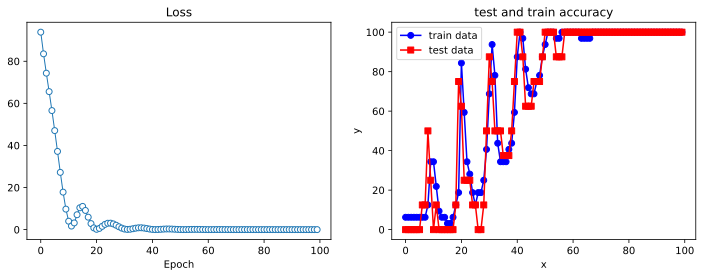

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(12,4))

ax[0].plot(losses,'o-',markerfacecolor='w',linewidth=1)
ax[0].set_xlabel('Epoch')
ax[0].set_title('Loss')

ax[1].plot(range(epochs),trainAcc,'bo-',label='train data')
ax[1].plot(range(epochs),testAcc,'rs-',label='test data')
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')
ax[1].set_title('test and train accuracy')
ax[1].legend()

plt.show()